In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df_MAIN = pd.read_csv("/Users/neelesh/Documents/FS-Sem2/fin_man/ESG-and-Financial-Performance/3) Data/main_df_no_NAN_99p.csv")
df_MAIN_cleaned = df_MAIN.dropna()
df_MAIN_cleaned.describe()

,Unnamed: 0,Year,Total Return,ESG Score,ESG Combined Score,ESG Controversies Score,Social Pillar Score,Governance Pillar Score,Environmental Pillar Score,Revenue - Mean,Earnings Per Share - Mean,Return On Equity - Mean,Volume,Company Market Cap,EBITDA - Mean
count,50736.000000,50736.00000,50736.000000,50736.000000,50736.000000,50736.000000,50736.000000,50736.000000,50736.000000,5.073600e+04,50736.000000,50736.000000,5.073600e+04,5.073600e+04,5.073600e+04
mean,105943.495861,2014.95179,14.092822,45.176767,43.920164,92.278124,45.446937,50.942291,38.138041,3.252298e+11,94.246883,13.599591,1.164860e+06,3.290298e+11,4.537727e+10
std,59609.025312,4.98485,41.259729,19.707534,18.826651,20.426456,22.992075,21.653620,28.029774,1.564371e+12,715.321399,19.839521,4.793798e+06,1.664073e+12,2.360485e+11
min,2.000000,2002.00000,-76.348632,4.470837,4.470837,3.846154,1.611402,3.956835,0.000000,0.000000e+00,-92.500500,-129.960000,0.000000e+00,8.836997e+07,-5.121924e+08
25%,54743.750000,2011.00000,-11.440238,29.172295,28.908182,100.000000,26.996637,33.609719,12.249763,1.253814e+09,0.390475,6.599918,0.000000e+00,2.359950e+09,2.621201e+08
50%,106842.500000,2016.00000,9.430330,44.644679,43.401165,100.000000,44.240609,51.544241,37.116274,5.493699e+09,1.594085,12.002540,1.562000e+04,9.353239e+09,1.035209e+09
75%,156939.250000,2019.00000,32.696180,60.650268,58.300877,100.000000,63.518516,68.585440,61.739893,3.555839e+10,5.254563,19.373888,3.741870e+05,6.005076e+10,6.673981e+09
max,206912.000000,2022.00000,256.142197,89.721799,87.471019,100.000000,95.077388,94.714260,95.529762,2.770789e+13,15036.339140,182.646000,6.600124e+07,3.417197e+13,4.636861e+12


In [3]:
df_MAIN_cleaned.head(5)

,Unnamed: 0,ISIN,Year,Total Return,ESG Score,ESG Combined Score,ESG Controversies Score,Social Pillar Score,Governance Pillar Score,Environmental Pillar Score,...,Return On Equity - Mean,Volume,Company Market Cap,EBITDA - Mean,Country of Headquarters,Region of Headquarters,TRBC Industry Name,TRBC Industry Group Name,TRBC Business Sector Name,TRBC Economic Sector Name
0,2,DK0010244508,2002,-4.703688,10.732601,10.732601,100.0,16.469428,16.153846,0.000000,...,18.19000,0.0,5.201496e+10,1.929737e+09,Denmark,Europe,Marine Freight & Logistics,Freight & Logistics Services,Transportation,Industrials
1,3,DK0010244508,2003,78.725725,16.933543,16.933543,100.0,19.033531,34.523810,0.000000,...,17.60000,0.0,1.828570e+11,6.631311e+09,Denmark,Europe,Marine Freight & Logistics,Freight & Logistics Services,Transportation,Industrials
2,4,DK0010244508,2004,6.899061,17.855846,17.855846,100.0,20.465337,26.862745,7.523148,...,20.58450,0.0,1.980218e+11,8.512478e+09,Denmark,Europe,Marine Freight & Logistics,Freight & Logistics Services,Transportation,Industrials
3,5,DK0010244508,2005,45.463359,16.395483,16.395483,100.0,20.152244,17.166667,11.683007,...,19.76857,0.0,2.821975e+11,8.136144e+09,Denmark,Europe,Marine Freight & Logistics,Freight & Logistics Services,Transportation,Industrials
4,6,DK0010244508,2006,-17.550102,18.732474,18.732474,60.0,20.633013,25.500000,11.033951,...,12.20555,0.0,2.292305e+11,9.496474e+09,Denmark,Europe,Marine Freight & Logistics,Freight & Logistics Services,Transportation,Industrials


In [4]:
#   Columns in df_MAIN_cleaned

#   ['Year',
#  'ISIN',
#  'Total Return',
#  'ESG Score',
#  'ESG Combined Score',
#  'ESG Controversies Score',
#  'Social Pillar Score',
#  'Governance Pillar Score',
#  'Environmental Pillar Score',
#  'Revenue - Mean',
#  'Earnings Per Share - Mean',
#  'Return On Equity - Mean',
#  'Volume',
#  'Company Market Cap',
#  'EBITDA - Mean',
#  'Country of Headquarters',
#  'Region of Headquarters',
#  'TRBC Industry Name',
#  'TRBC Industry Group Name',
#  'TRBC Business Sector Name',
#  'TRBC Economic Sector Name']

/var/folders/wx/1_76tj0s15gc4yxmndvw4l_00000gn/T/ipykernel_3777/2996985170.py:18: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr_matrix, dtype=np.bool)


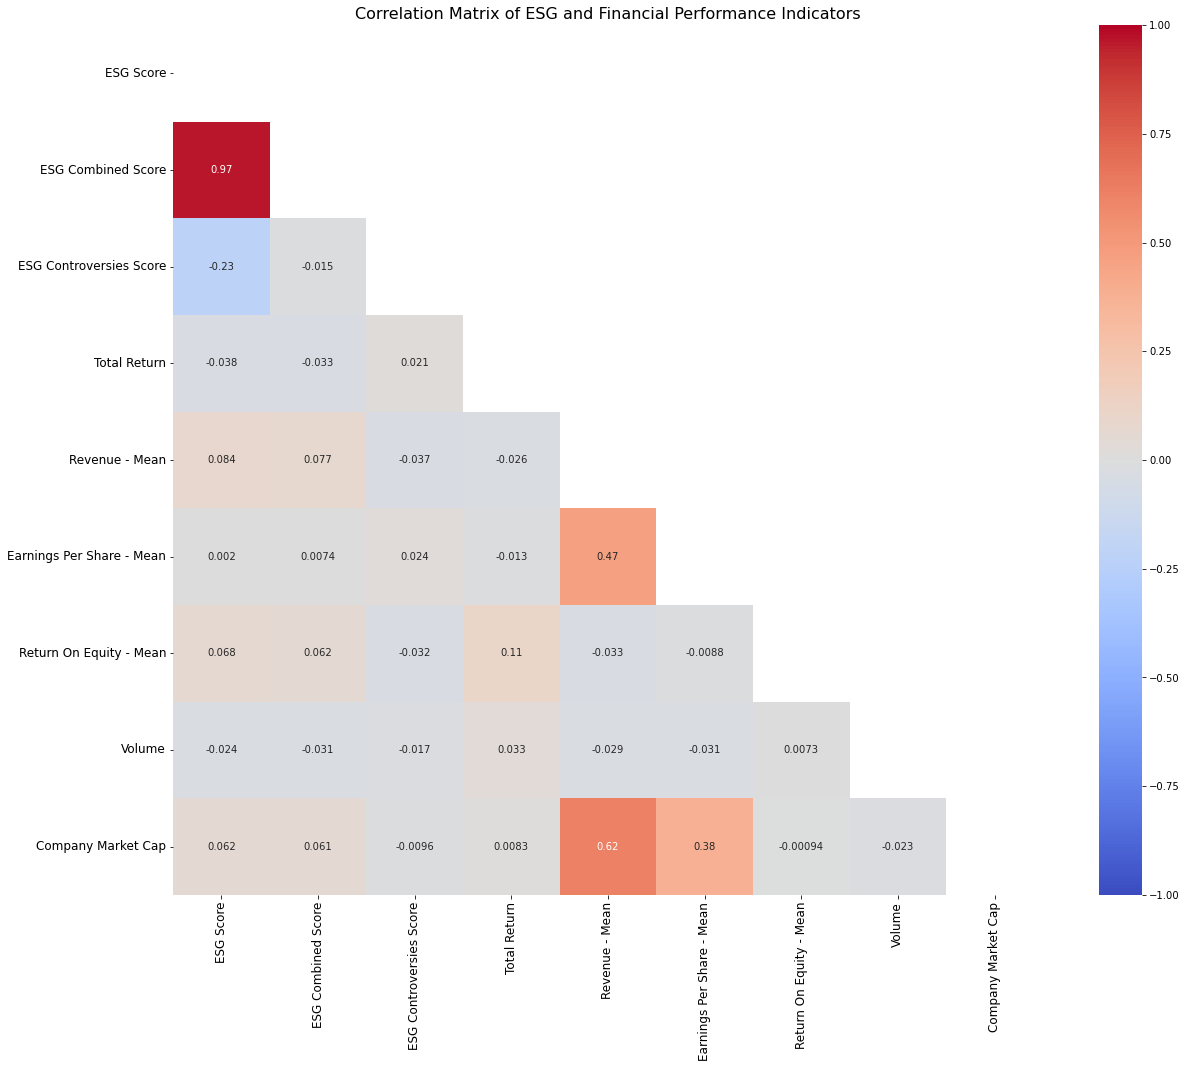

In [5]:
# Correlation matrix with both ESG and financial performance indicators [FOR ALL COMPANIES]
cols = ['ESG Score',
        'ESG Combined Score',
        'ESG Controversies Score',
        'Total Return',
        'Revenue - Mean',
        'Earnings Per Share - Mean',
        'Return On Equity - Mean',
        'Volume',
        'Company Market Cap']

df_selected = df_MAIN_cleaned[cols]

# Compute correlation matrix
corr_matrix = df_selected.corr()

# Create mask for the upper triangle
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Plot heatmap
fig, ax = plt.subplots(figsize=(20, 16))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', mask=mask, ax=ax, vmin=-1, vmax=1, square=True)
plt.title('Correlation Matrix of ESG and Financial Performance Indicators', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

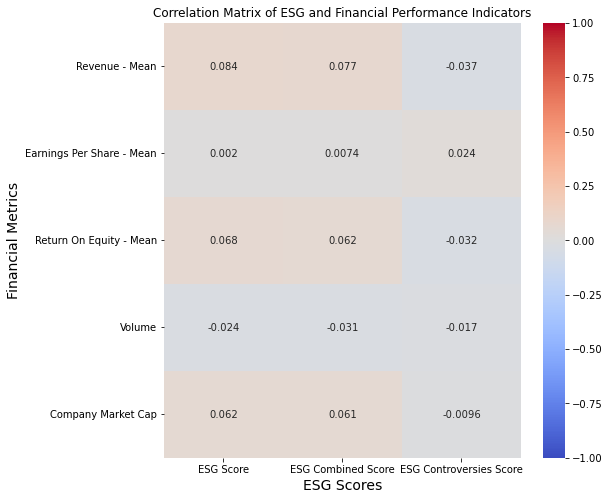

In [6]:
# Heatmap for the above correlation

# Select the columns of interest
cols = ['ESG Score', 'ESG Combined Score', 'ESG Controversies Score',
        'Revenue - Mean', 'Earnings Per Share - Mean', 'Return On Equity - Mean',
        'Volume', 'Company Market Cap']
df_selected = df_MAIN_cleaned[cols]

# Compute correlation matrix
corr_matrix = df_selected.corr()

# Extract the correlations between Financial Metrics and the three ESG scores
corr_matrix = corr_matrix.loc[['Revenue - Mean', 'Earnings Per Share - Mean',
                               'Return On Equity - Mean', 'Volume', 'Company Market Cap'],
                              ['ESG Score','ESG Combined Score','ESG Controversies Score']]

# Visualize the correlation matrix
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of ESG and Financial Performance Indicators')
plt.xlabel('ESG Scores', fontsize=14)
plt.ylabel('Financial Metrics', fontsize=14)
plt.show()

/var/folders/wx/1_76tj0s15gc4yxmndvw4l_00000gn/T/ipykernel_3777/2426515728.py:31: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr_matrix, dtype=np.bool)


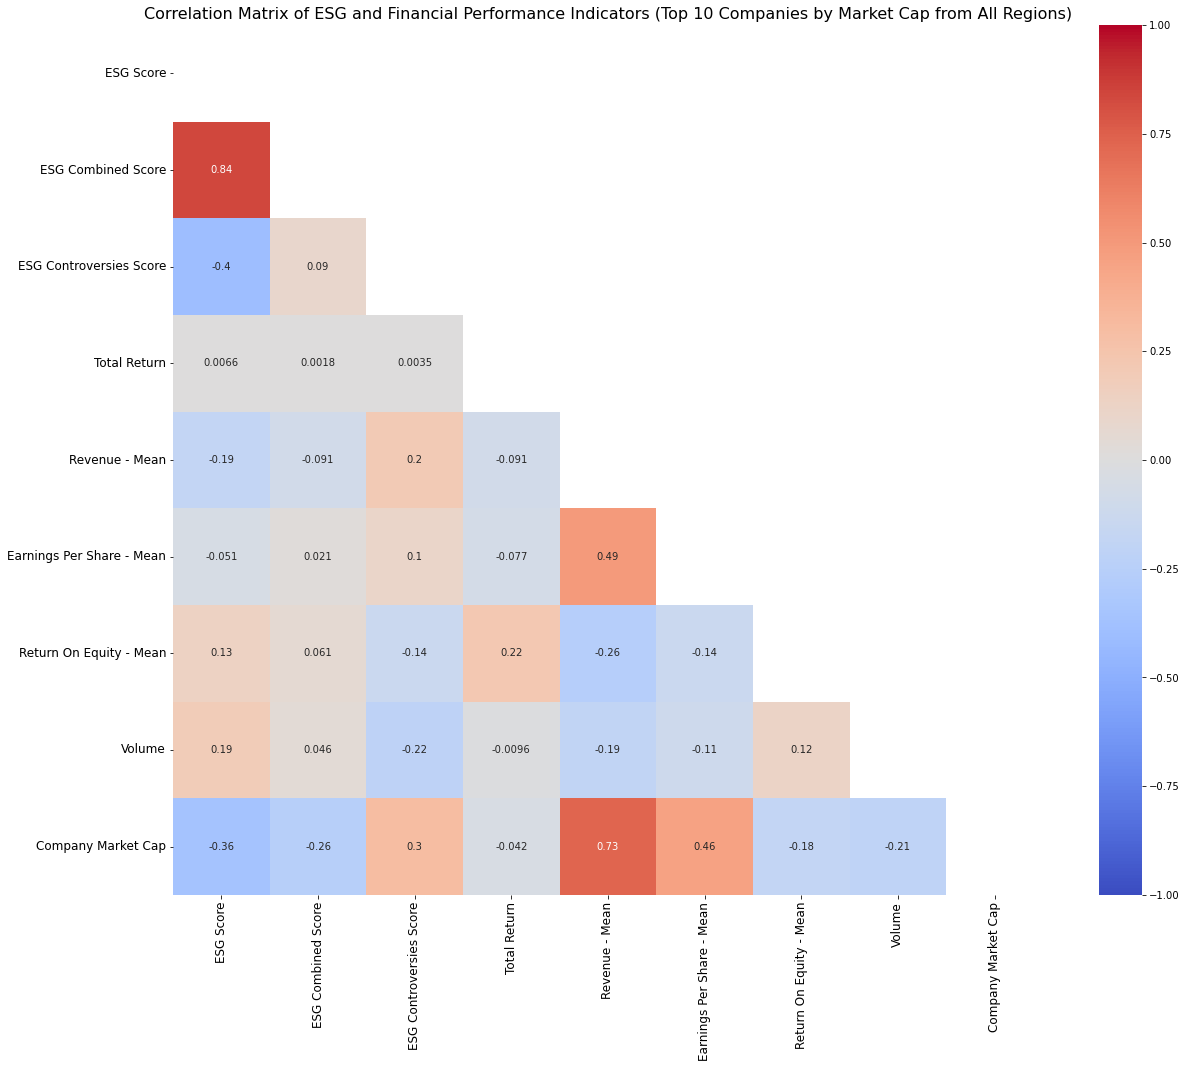

In [7]:
# Correlation matrix with both ESG and financial performance indicators 

# [FOR TOP-10 MARKET-CAP COMPANIES IN ALL REGIONS]



# Filter top 10 companies by market cap from all regions
top_n_df_intermediate = df_MAIN_cleaned.groupby('Region of Headquarters') \
            .apply(lambda x: x.groupby('ISIN') \
            .agg({'Company Market Cap': 'mean'}) \
            .nlargest(10, 'Company Market Cap')) \
            .reset_index()
    
top_n_df = df_MAIN_cleaned.merge(top_n_df_intermediate['ISIN'], on='ISIN', how='inner')


cols = ['ESG Score',
        'ESG Combined Score',
        'ESG Controversies Score',
        'Total Return',
        'Revenue - Mean',
        'Earnings Per Share - Mean',
        'Return On Equity - Mean',
        'Volume',
        'Company Market Cap']

df_selected = top_n_df[cols]

corr_matrix = df_selected.corr()

mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(20, 16))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', mask=mask, ax=ax, vmin=-1, vmax=1, square=True)
plt.title('Correlation Matrix of ESG and Financial Performance Indicators (Top 10 Companies by Market Cap from All Regions)', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

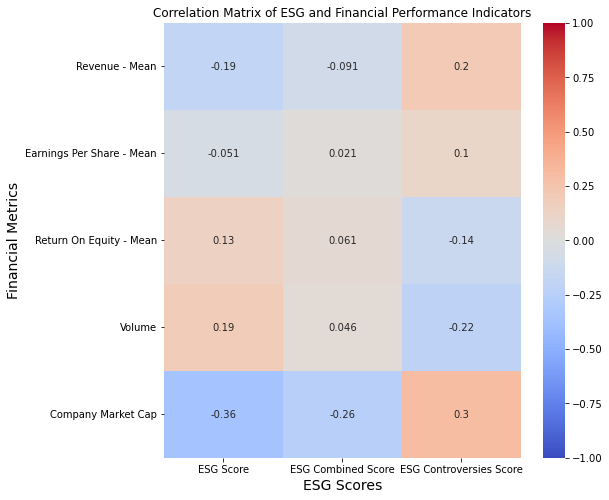

In [8]:
# Heatmap for the above correlation

# [FOR TOP-10 MARKET-CAP COMPANIES IN ALL REGIONS]

# Filter top 10 companies by market cap from all regions
top_n_df_intermediate = df_MAIN_cleaned.groupby('Region of Headquarters') \
            .apply(lambda x: x.groupby('ISIN') \
            .agg({'Company Market Cap': 'mean'}) \
            .nlargest(10, 'Company Market Cap')) \
            .reset_index()
    
top_n_df = df_MAIN_cleaned.merge(top_n_df_intermediate['ISIN'], on='ISIN', how='inner')

# Select the columns of interest
cols = ['ESG Score', 'ESG Combined Score', 'ESG Controversies Score',
        'Revenue - Mean', 'Earnings Per Share - Mean', 'Return On Equity - Mean',
        'Volume', 'Company Market Cap']
df_selected = top_n_df[cols]

# Compute correlation matrix
corr_matrix = df_selected.corr()

# Extract the correlations between Financial Metrics and the three ESG scores
corr_matrix = corr_matrix.loc[['Revenue - Mean', 'Earnings Per Share - Mean',
                               'Return On Equity - Mean', 'Volume', 'Company Market Cap'],
                              ['ESG Score','ESG Combined Score','ESG Controversies Score']]

# Visualize the correlation matrix
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of ESG and Financial Performance Indicators')
plt.xlabel('ESG Scores', fontsize=14)
plt.ylabel('Financial Metrics', fontsize=14)
plt.show()


/var/folders/wx/1_76tj0s15gc4yxmndvw4l_00000gn/T/ipykernel_3777/2163659609.py:23: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr_matrix, dtype=np.bool)


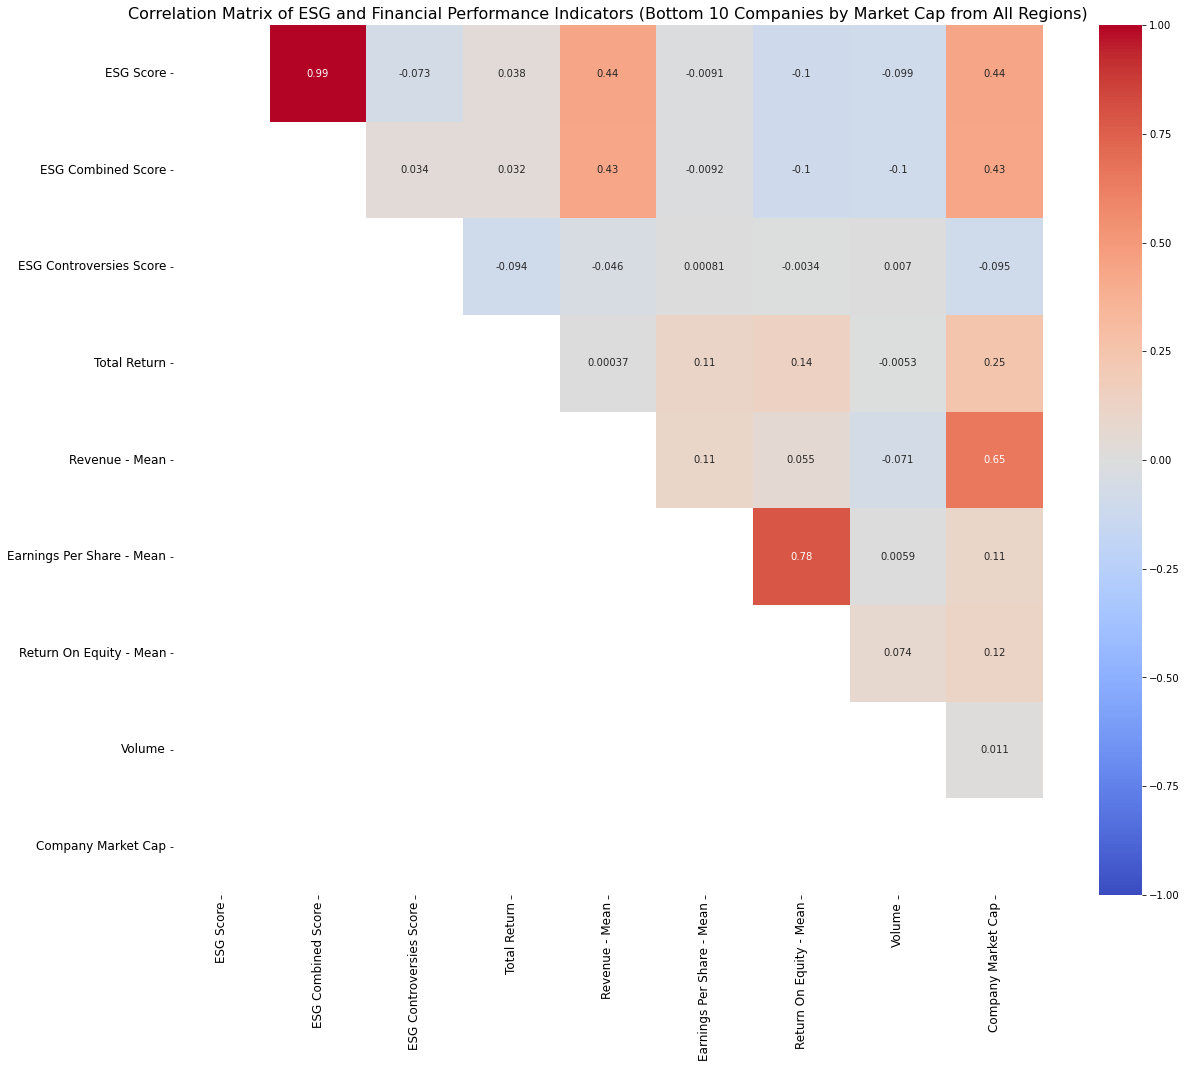

In [9]:
# Correlation matrix with both ESG and financial performance indicators 

# [FOR BOTTOM-10 MARKET-CAP COMPANIES IN ALL REGIONS]



# Filter bottom 10 companies by market cap from all regions
bottom_n_df_intermediate = df_MAIN_cleaned.groupby('Region of Headquarters') \
            .apply(lambda x: x.groupby('ISIN') \
            .agg({'Company Market Cap': 'mean'}) \
            .nsmallest(10, 'Company Market Cap')) \
            .reset_index()
    
bottom_n_df = df_MAIN_cleaned.merge(bottom_n_df_intermediate['ISIN'], on='ISIN', how='inner')


cols = ['ESG Score',        'ESG Combined Score',        'ESG Controversies Score',        'Total Return',        'Revenue - Mean',        'Earnings Per Share - Mean',        'Return On Equity - Mean',        'Volume',        'Company Market Cap']

df_selected = bottom_n_df[cols]

corr_matrix = df_selected.corr()

mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = False
mask[np.tril_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(20, 16))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', mask=mask, ax=ax, vmin=-1, vmax=1, square=True)
plt.title('Correlation Matrix of ESG and Financial Performance Indicators (Bottom 10 Companies by Market Cap from All Regions)', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

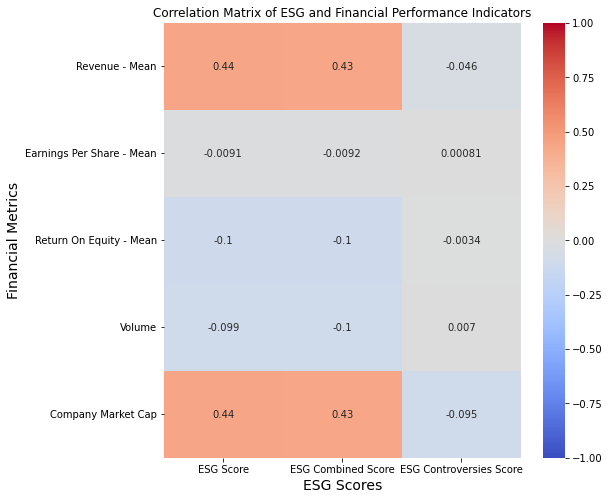

In [10]:
# Heatmap for the above correlation

# [FOR BOTTOM-10 MARKET-CAP COMPANIES IN ALL REGIONS]

# Filter bottom 10 companies by market cap from all regions
bottom_n_df_intermediate = df_MAIN_cleaned.groupby('Region of Headquarters') \
            .apply(lambda x: x.groupby('ISIN') \
            .agg({'Company Market Cap': 'mean'}) \
            .nsmallest(10, 'Company Market Cap')) \
            .reset_index()
    
bottom_n_df = df_MAIN_cleaned.merge(bottom_n_df_intermediate['ISIN'], on='ISIN', how='inner')

# Select the columns of interest
cols = ['ESG Score', 'ESG Combined Score', 'ESG Controversies Score',
        'Revenue - Mean', 'Earnings Per Share - Mean', 'Return On Equity - Mean',
        'Volume', 'Company Market Cap']
df_selected = bottom_n_df[cols]

# Compute correlation matrix
corr_matrix = df_selected.corr()

# Extract the correlations between Financial Metrics and the three ESG scores
corr_matrix = corr_matrix.loc[['Revenue - Mean', 'Earnings Per Share - Mean',
                               'Return On Equity - Mean', 'Volume', 'Company Market Cap'],
                              ['ESG Score','ESG Combined Score','ESG Controversies Score']]

# Visualize the correlation matrix
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of ESG and Financial Performance Indicators')
plt.xlabel('ESG Scores', fontsize=14)
plt.ylabel('Financial Metrics', fontsize=14)
plt.show()

In [11]:
# Function for "Fititng Random Forest Regression on ESG Score to Financial features"

# For TOP MARKET-CAP COMPANIES IN ALL REGIONS

def model_ESG(n, target_feature):
    
    results = pd.DataFrame({'number': n, 'mse': [0]*len(n), 'r2': [0]*len(n)})
    for i in range (len(n)):
        results['number'][i] = n[i]

        top_n_df_intermediate = df_MAIN_cleaned.groupby('Region of Headquarters') \
            .apply(lambda x: x.groupby('ISIN') \
            .agg({'Company Market Cap': 'mean'}) \
            .nlargest(n[i], 'Company Market Cap')) \
            .reset_index()
    
        top_n_df = df_MAIN_cleaned.merge(top_n_df_intermediate['ISIN'], on='ISIN', how='inner')

        top_n_df_reg = top_n_df[['ESG Score',
                                'ESG Combined Score',
                                'ESG Controversies Score',
                                'Social Pillar Score',
                                'Governance Pillar Score',
                                'Environmental Pillar Score',
                                'Total Return',
                                'Revenue - Mean',
                                'Earnings Per Share - Mean',
                                'Return On Equity - Mean',
                                'Volume',
                                'Company Market Cap',
                                'EBITDA - Mean']]
        
        X = top_n_df_reg[['Total Return',
                                'Revenue - Mean',
                                'Earnings Per Share - Mean',
                                'Return On Equity - Mean',
                                'Company Market Cap',
                                'EBITDA - Mean']]
        y = top_n_df_reg[target_feature]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 101)
        regr = RandomForestRegressor(n_estimators = 10, max_depth = 10, random_state = 101)
        regr.fit(X_train, y_train.values.ravel())
        predictions = regr.predict(X_test)
        # Mean squared error (MSE)
        results['mse'][i] = mean_squared_error(y_test.values.ravel(), predictions)
        # R-squared scores
        results['r2'][i] = r2_score(y_test.values.ravel(), predictions)
        
    return results
    

In [12]:
# Running RF regression on TOP-n MARKET CAP COMPANIES using above function
n = [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 20, 50, 100, 150, 200, 250, 500, 700, 800]
target_feature = 'ESG Score'

results_ = model_ESG(n, target_feature)
results_

/var/folders/wx/1_76tj0s15gc4yxmndvw4l_00000gn/T/ipykernel_3777/3868683399.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results['r2'][i] = r2_score(y_test.values.ravel(), predictions)
/var/folders/wx/1_76tj0s15gc4yxmndvw4l_00000gn/T/ipykernel_3777/3868683399.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results['number'][i] = n[i]
/var/folders/wx/1_76tj0s15gc4yxmndvw4l_00000gn/T/ipykernel_3777/3868683399.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

,number,mse,r2
0,5,347.227328,0.178780
1,6,187.996879,0.273563
2,7,214.535267,0.394332
3,8,202.912664,0.309661
4,9,142.854222,0.629709
5,10,179.965364,0.524144
6,11,225.776798,0.257935
7,12,185.542275,0.540953
8,13,201.573903,0.356265
9,14,242.408850,0.372654


In [13]:
# Running RF regression on TOP-n MARKET CAP COMPANIES using above function
n = [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 20, 50, 100, 150, 200, 250, 500, 700, 800]
target_feature = 'ESG Combined Score'

results_ = model_ESG(n, target_feature)
results_

/var/folders/wx/1_76tj0s15gc4yxmndvw4l_00000gn/T/ipykernel_3777/3868683399.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results['r2'][i] = r2_score(y_test.values.ravel(), predictions)
/var/folders/wx/1_76tj0s15gc4yxmndvw4l_00000gn/T/ipykernel_3777/3868683399.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results['number'][i] = n[i]
/var/folders/wx/1_76tj0s15gc4yxmndvw4l_00000gn/T/ipykernel_3777/3868683399.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

,number,mse,r2
0,5,320.604879,-0.060774
1,6,205.902809,-0.020217
2,7,183.628320,0.235360
3,8,202.511018,0.190232
4,9,168.254787,0.487960
5,10,158.927415,0.484124
6,11,197.960211,0.229788
7,12,212.192817,0.343147
8,13,196.280063,0.219877
9,14,245.808179,0.153725


In [14]:
# Running RF regression on TOP-n MARKET CAP COMPANIES using above function
n = [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 20, 50, 100, 150, 200, 250, 500, 700, 800]
target_feature = 'ESG Controversies Score'

results_ = model_ESG(n, target_feature)
results_

/var/folders/wx/1_76tj0s15gc4yxmndvw4l_00000gn/T/ipykernel_3777/3868683399.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results['r2'][i] = r2_score(y_test.values.ravel(), predictions)
/var/folders/wx/1_76tj0s15gc4yxmndvw4l_00000gn/T/ipykernel_3777/3868683399.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results['number'][i] = n[i]
/var/folders/wx/1_76tj0s15gc4yxmndvw4l_00000gn/T/ipykernel_3777/3868683399.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

,number,mse,r2
0,5,950.953717,0.093761
1,6,652.003965,0.172681
2,7,653.752347,0.388545
3,8,966.842176,-0.026683
4,9,548.554750,-0.123253
5,10,716.056783,0.138124
6,11,661.022009,-0.096447
7,12,585.688168,0.193849
8,13,547.370114,0.206227
9,14,916.377063,0.174823


In [15]:
# Running RF regression on TOP-n MARKET CAP COMPANIES using above function
n = [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 20, 50, 100, 150, 200, 250, 500, 700, 800]
target_feature = 'Social Pillar Score'

results_ = model_ESG(n, target_feature)
results_

/var/folders/wx/1_76tj0s15gc4yxmndvw4l_00000gn/T/ipykernel_3777/3868683399.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results['r2'][i] = r2_score(y_test.values.ravel(), predictions)
/var/folders/wx/1_76tj0s15gc4yxmndvw4l_00000gn/T/ipykernel_3777/3868683399.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results['number'][i] = n[i]
/var/folders/wx/1_76tj0s15gc4yxmndvw4l_00000gn/T/ipykernel_3777/3868683399.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

,number,mse,r2
0,5,458.391277,0.147584
1,6,364.160899,0.149200
2,7,290.385396,0.241037
3,8,381.845773,0.020149
4,9,313.688290,0.371270
5,10,256.370830,0.468904
6,11,313.032772,0.161100
7,12,310.454534,0.299026
8,13,363.694146,0.114360
9,14,335.526697,0.221062


In [16]:
# Running RF regression on TOP-n MARKET CAP COMPANIES using above function
n = [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 20, 50, 100, 150, 200, 250, 500, 700, 800]
target_feature = 'Governance Pillar Score'

results_ = model_ESG(n, target_feature)
results_

/var/folders/wx/1_76tj0s15gc4yxmndvw4l_00000gn/T/ipykernel_3777/3868683399.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results['r2'][i] = r2_score(y_test.values.ravel(), predictions)
/var/folders/wx/1_76tj0s15gc4yxmndvw4l_00000gn/T/ipykernel_3777/3868683399.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results['number'][i] = n[i]
/var/folders/wx/1_76tj0s15gc4yxmndvw4l_00000gn/T/ipykernel_3777/3868683399.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

,number,mse,r2
0,5,321.088923,0.461096
1,6,286.517479,0.409849
2,7,281.938722,0.498654
3,8,266.212394,0.423254
4,9,252.068673,0.581167
5,10,307.698434,0.506661
6,11,357.459398,0.395455
7,12,307.105349,0.538610
8,13,380.273086,0.325257
9,14,423.814146,0.327691


In [17]:
# Running RF regression on TOP-n MARKET CAP COMPANIES using above function
n = [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 20, 50, 100, 150, 200, 250, 500, 700, 800]
target_feature = 'Environmental Pillar Score'

results_ = model_ESG(n, target_feature)
results_

/var/folders/wx/1_76tj0s15gc4yxmndvw4l_00000gn/T/ipykernel_3777/3868683399.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results['r2'][i] = r2_score(y_test.values.ravel(), predictions)
/var/folders/wx/1_76tj0s15gc4yxmndvw4l_00000gn/T/ipykernel_3777/3868683399.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results['number'][i] = n[i]
/var/folders/wx/1_76tj0s15gc4yxmndvw4l_00000gn/T/ipykernel_3777/3868683399.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

,number,mse,r2
0,5,360.388531,0.420863
1,6,352.406024,0.217853
2,7,246.592945,0.573688
3,8,235.011921,0.528532
4,9,237.041620,0.610345
5,10,221.870061,0.604267
6,11,309.269507,0.326233
7,12,277.565396,0.573649
8,13,287.015977,0.425484
9,14,230.129712,0.559215


In [18]:
# Function for Fitting Random Forest Regression on ESG Score to Financial features

# For BOTTOM MARKET-CAP COMPANIES IN ALL REGIONS

def model_ESG_bottom(n, target_feature):
    
    results = pd.DataFrame({'number': n, 'mse': [0]*len(n), 'r2': [0]*len(n)})
    for i in range (len(n)):
        results['number'][i] = n[i]

        bottom_n_df_intermediate = df_MAIN_cleaned.groupby('Region of Headquarters') \
            .apply(lambda x: x.groupby('ISIN') \
            .agg({'Company Market Cap': 'mean'}) \
            .nsmallest(n[i], 'Company Market Cap')) \
            .reset_index()
    
        bottom_n_df = df_MAIN_cleaned.merge(bottom_n_df_intermediate['ISIN'], on='ISIN', how='inner')

        bottom_n_df_reg = bottom_n_df[['ESG Score','ESG Combined Score','ESG Controversies Score','Social Pillar Score','Governance Pillar Score','Environmental Pillar Score','Total Return','Revenue - Mean','Earnings Per Share - Mean','Return On Equity - Mean','Volume','Company Market Cap','EBITDA - Mean']]
        
        X = bottom_n_df_reg[['Total Return','Revenue - Mean','Earnings Per Share - Mean','Return On Equity - Mean','Company Market Cap','EBITDA - Mean']]
        y = bottom_n_df_reg[target_feature]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 101)
        regr = RandomForestRegressor(n_estimators = 10, max_depth = 10, random_state = 101)
        regr.fit(X_train, y_train.values.ravel())
        predictions = regr.predict(X_test)
        # Mean squared error (MSE)
        results['mse'][i] = mean_squared_error(y_test.values.ravel(), predictions)
        # R-squared scores
        results['r2'][i] = r2_score(y_test.values.ravel(), predictions)
        
    return results


In [19]:
# Running RF regression on BOTTOM-n MARKET CAP COMPANIES using above function
n = [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 20, 50, 100, 150, 200, 250, 500, 700, 800]
target_feature = 'ESG Score'

results_ = model_ESG_bottom(n, target_feature)
results_

/var/folders/wx/1_76tj0s15gc4yxmndvw4l_00000gn/T/ipykernel_3777/3294723252.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results['r2'][i] = r2_score(y_test.values.ravel(), predictions)
/var/folders/wx/1_76tj0s15gc4yxmndvw4l_00000gn/T/ipykernel_3777/3294723252.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results['number'][i] = n[i]
/var/folders/wx/1_76tj0s15gc4yxmndvw4l_00000gn/T/ipykernel_3777/3294723252.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

,number,mse,r2
0,5,241.934291,-0.505232
1,6,226.538180,-0.257715
2,7,283.827315,0.107163
3,8,90.174993,0.414748
4,9,195.796630,0.369898
5,10,107.979699,0.607922
6,11,88.824046,0.625741
7,12,184.705201,0.273122
8,13,194.097621,0.180493
9,14,179.207447,0.344153


In [20]:
# Running RF regression on BOTTOM-n MARKET CAP COMPANIES using above function
n = [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 20, 50, 100, 150, 200, 250, 500, 700, 800]
target_feature = 'ESG Combined Score'

results_ = model_ESG_bottom(n, target_feature)
results_

/var/folders/wx/1_76tj0s15gc4yxmndvw4l_00000gn/T/ipykernel_3777/3294723252.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results['r2'][i] = r2_score(y_test.values.ravel(), predictions)
/var/folders/wx/1_76tj0s15gc4yxmndvw4l_00000gn/T/ipykernel_3777/3294723252.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results['number'][i] = n[i]
/var/folders/wx/1_76tj0s15gc4yxmndvw4l_00000gn/T/ipykernel_3777/3294723252.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

,number,mse,r2
0,5,241.934291,-0.505232
1,6,226.538180,-0.257715
2,7,297.271435,0.064872
3,8,105.720652,0.302042
4,9,208.595847,0.328708
5,10,125.833192,0.543095
6,11,87.821970,0.629964
7,12,157.346297,0.363629
8,13,188.140109,0.205646
9,14,174.248768,0.306960


In [21]:
# Running RF regression on BOTTOM-n MARKET CAP COMPANIES using above function
n = [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 20, 50, 100, 150, 200, 250, 500, 700, 800]
target_feature = 'ESG Controversies Score'

results_ = model_ESG_bottom(n, target_feature)
results_

/var/folders/wx/1_76tj0s15gc4yxmndvw4l_00000gn/T/ipykernel_3777/3294723252.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results['r2'][i] = r2_score(y_test.values.ravel(), predictions)
/var/folders/wx/1_76tj0s15gc4yxmndvw4l_00000gn/T/ipykernel_3777/3294723252.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results['number'][i] = n[i]
/var/folders/wx/1_76tj0s15gc4yxmndvw4l_00000gn/T/ipykernel_3777/3294723252.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

,number,mse,r2
0,5,16.224986,0.000000
1,6,0.000000,1.000000
2,7,154.276045,0.000000
3,8,400.361451,-0.074892
4,9,120.795473,-4.906955
5,10,102.713615,0.000000
6,11,58.919647,0.000000
7,12,214.391049,-0.096503
8,13,163.124690,-2.854762
9,14,237.180902,-0.267897


In [22]:
# Running RF regression on BOTTOM-n MARKET CAP COMPANIES using above function
n = [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 20, 50, 100, 150, 200, 250, 500, 700, 800]
target_feature = 'Social Pillar Score'

results_ = model_ESG_bottom(n, target_feature)
results_

/var/folders/wx/1_76tj0s15gc4yxmndvw4l_00000gn/T/ipykernel_3777/3294723252.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results['r2'][i] = r2_score(y_test.values.ravel(), predictions)
/var/folders/wx/1_76tj0s15gc4yxmndvw4l_00000gn/T/ipykernel_3777/3294723252.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results['number'][i] = n[i]
/var/folders/wx/1_76tj0s15gc4yxmndvw4l_00000gn/T/ipykernel_3777/3294723252.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

,number,mse,r2
0,5,302.530852,-0.161969
1,6,401.290974,-0.163227
2,7,361.228243,-0.227296
3,8,106.772022,0.498259
4,9,269.771675,0.357215
5,10,221.359024,0.440761
6,11,167.345919,0.515125
7,12,380.727388,0.180830
8,13,237.454988,0.426843
9,14,300.116708,0.220112


In [23]:
# Running RF regression on BOTTOM-n MARKET CAP COMPANIES using above function
n = [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 20, 50, 100, 150, 200, 250, 500, 700, 800]
target_feature = 'Governance Pillar Score'

results_ = model_ESG_bottom(n, target_feature)
results_

/var/folders/wx/1_76tj0s15gc4yxmndvw4l_00000gn/T/ipykernel_3777/3294723252.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results['r2'][i] = r2_score(y_test.values.ravel(), predictions)
/var/folders/wx/1_76tj0s15gc4yxmndvw4l_00000gn/T/ipykernel_3777/3294723252.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results['number'][i] = n[i]
/var/folders/wx/1_76tj0s15gc4yxmndvw4l_00000gn/T/ipykernel_3777/3294723252.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

,number,mse,r2
0,5,387.725239,-1.119509
1,6,691.259853,-0.668106
2,7,538.637200,0.238112
3,8,466.887247,-0.334617
4,9,451.653734,0.384803
5,10,274.678272,0.367467
6,11,334.711324,0.288908
7,12,367.590046,0.269407
8,13,427.747271,0.149415
9,14,323.547227,0.408577


In [24]:
# Running RF regression on BOTTOM-n MARKET CAP COMPANIES using above function
n = [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 20, 50, 100, 150, 200, 250, 500, 700, 800]
target_feature = 'Environmental Pillar Score'

results_ = model_ESG_bottom(n, target_feature)
results_

/var/folders/wx/1_76tj0s15gc4yxmndvw4l_00000gn/T/ipykernel_3777/3294723252.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results['r2'][i] = r2_score(y_test.values.ravel(), predictions)
/var/folders/wx/1_76tj0s15gc4yxmndvw4l_00000gn/T/ipykernel_3777/3294723252.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results['number'][i] = n[i]
/var/folders/wx/1_76tj0s15gc4yxmndvw4l_00000gn/T/ipykernel_3777/3294723252.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

,number,mse,r2
0,5,297.385543,0.146915
1,6,340.203586,-0.035848
2,7,292.762758,0.243457
3,8,262.720073,0.271425
4,9,403.917391,0.166075
5,10,327.403688,0.348079
6,11,185.700644,0.501460
7,12,206.400196,0.404667
8,13,312.806290,0.152861
9,14,240.861793,0.287456
